In [1]:
import numpy as np 
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sn

In [ ]:
idx = pd.read_csv('profiles.csv')
idx['length'] = idx['ticker'].str.len()
idx = idx[idx['length'] <6].reset_index(drop = True)
dummy = ['JK']*len(idx)
stock_idx = list(idx['ticker'].str.cat(dummy, sep = '.'))

In [ ]:
data = yf.Tickers(stock_idx)
stock = []
remove = []
count = 0
for i in stock_idx: 
    count += 1
    print(f'Progress : {count}/{len(stock_idx)}')
    try :
        if (data.tickers[i].info['priceToBook'] <= 2) & (data.tickers[i].info['returnOnEquity'] > 0.15):
            stock.append(i)
    except:
        remove.append(i)

In [ ]:
stock

In [ ]:
try :
       df.drop(['ARMY.JK','APLN.JK', 'ARTI.JK','BUVA.JK', 'CINT.JK', 'CPRI.JK', 'DPUM.JK', 'ENVY.JK', 'FORZ.JK',
              'HOME.JK', 'IBFN.JK', 'JSPT.JK','KPAS.JK', 'LCGP.JK', 'MAGP.JK', 'MIRA.JK', 'RMBA.JK', 'SMRU.JK',], axis = 1, inplace = True)
except: 
       pass

In [2]:
stock = ['ADMF.JK',
 'AKPI.JK',
 'ALDO.JK',
 'AMFG.JK',
 'ASII.JK',
 'BBCA.JK',
 'BISI.JK',
 'BJBR.JK',
 'CEKA.JK',
 'DIVA.JK',
 'EMDE.JK',
 'ERAA.JK',
 'FAPA.JK',
 'GOOD.JK',
 'HRTA.JK',
 'IGAR.JK',
 'LTLS.JK',
 'MDLN.JK',
 'MFIN.JK',
 'MLIA.JK',
 'MNCN.JK',
 'NICK.JK',
 'PALM.JK',
 'PANS.JK',
 'PBID.JK',
 'PBSA.JK',
 'PNGO.JK',
 'PPGL.JK',
 'PTPW.JK',
 'SCMA.JK',
 'SGRO.JK',
 'SMAR.JK',
 'SMKL.JK',
 'SOSS.JK',
 'SPMA.JK',
 'SRTG.JK',
 'TEBE.JK',
 'TINS.JK',
 'TRJA.JK',
 'TURI.JK',
 'UNTR.JK',
 'WMUU.JK',
 'WOOD.JK']

In [3]:
year = 2022
ds = str(year-1)+'-12-01'
df = pd.DataFrame(columns=stock)
for i in stock :
    temp = yf.Ticker(i).history(period = '1y', start = ds, interval = '1mo',actions=False).dropna()[['Close']][:-1]
    log_return = np.log(temp['Close']/temp['Close'].shift(1)).dropna()
    df[i] = log_return
curr_ = df.describe().T
curr_ = curr_[curr_['mean']>0]
curr_stock = set(curr_.index)

In [4]:
stock = curr_stock
year = 2020
ds = str(year-3)+'-12-01'
de = str(year+1)+'-12-01'
df = pd.DataFrame(columns=stock)
for i in stock :
    temp = yf.Ticker(i).history(period =  "3y" , start = ds ,end =de ,interval = '1mo',actions=False).dropna()[['Close']]
    if temp.shape[0] == 49:
        log_return = np.log(temp['Close']/temp['Close'].shift(1)).dropna()
        df[i] = log_return
df.dropna(axis = 1, inplace = True)

In [5]:
try :
    df.drop(['TURI.JK'], axis = 1, inplace = True)
except:
    pass

In [6]:
mu = df.mean().values
C = df.cov().values

def objective(weights): 
    weights = np.array(weights)
    return weights.dot(C).dot(weights.T)

# The constraints
cons = (
    {"type":"eq", "fun": lambda x: np.sum(x)-1}, 
    #{"type": "ineq", "fun": lambda x: np.sum(mu*x)-0.03}
        )

bounds = tuple((0,1) for x in range(mu.shape[0]))
guess = [1./mu.shape[0] for x in range(mu.shape[0])]
optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
x_ = np.round(optimized_results.x,4)

In [22]:
port_ = dict(zip(df.columns,np.round(x_,5)))
port = dict()
for (key,value) in port_.items():
    if value >0 : 
        port[key] = value
port_df = pd.DataFrame(port_, index = ['Percentage'])
port_df

,MFIN.JK,SMAR.JK,SGRO.JK,BBCA.JK,BJBR.JK,PANS.JK,CEKA.JK,AKPI.JK,UNTR.JK,AMFG.JK,...,MDLN.JK,BISI.JK,SRTG.JK,LTLS.JK,IGAR.JK,PALM.JK,ASII.JK,ADMF.JK,HRTA.JK,PBSA.JK
Percentage,0.1621,0.0,0.2205,0.1036,0.0,0.0,0.0818,0.0,0.076,0.0881,...,0.0,0.0,0.0949,0.0054,0.0371,0.0427,0.0217,0.0356,0.0304,0.0


In [8]:
start = 6e7 
budget_ = dict()
for (key,value) in port.items():
    if value >0 : 
        budget_[key] = value*start
budget_

{'MFIN.JK': 9726000.0,
 'SGRO.JK': 13230000.0,
 'BBCA.JK': 6216000.0,
 'CEKA.JK': 4908000.0,
 'UNTR.JK': 4560000.0,
 'AMFG.JK': 5286000.0,
 'SRTG.JK': 5694000.0,
 'LTLS.JK': 324000.0,
 'IGAR.JK': 2226000.0,
 'PALM.JK': 2562000.0,
 'ASII.JK': 1302000.0,
 'ADMF.JK': 2136000.0,
 'HRTA.JK': 1824000.0}

In [9]:
budget = pd.DataFrame.from_dict(data= budget_, orient= 'index').T
budget.rename(index={0: 'Total Spread'}, inplace= True)
budget

,MFIN.JK,SGRO.JK,BBCA.JK,CEKA.JK,UNTR.JK,AMFG.JK,SRTG.JK,LTLS.JK,IGAR.JK,PALM.JK,ASII.JK,ADMF.JK,HRTA.JK
Total Spread,9726000.0,13230000.0,6216000.0,4908000.0,4560000.0,5286000.0,5694000.0,324000.0,2226000.0,2562000.0,1302000.0,2136000.0,1824000.0


In [10]:
expense = pd.DataFrame(columns=port.keys())
for item in port.keys(): 
    temp = yf.Ticker(item).history(period = '1d', interval = '1mo',actions=False)
    expense[item] = temp['Close']*100 #1 lot
expense.rename(index={expense.index[0]: str('Closing ' + str(expense.index[0]).split(' ')[0])}, inplace= True)
expense

,MFIN.JK,SGRO.JK,BBCA.JK,CEKA.JK,UNTR.JK,AMFG.JK,SRTG.JK,LTLS.JK,IGAR.JK,PALM.JK,ASII.JK,ADMF.JK,HRTA.JK
Date,,,,,,,,,,,,,
Closing 2022-09-23,174500.0,220000.0,837500.0,228000.0,3400000.0,557500.0,294000.0,151500.0,48400.0,83000.0,715000.0,852500.0,20800.0


In [23]:
qty = pd.concat([expense,budget])
temp_ = pd.DataFrame(np.round(qty.iloc[1] / qty.iloc[0],0)).T
temp_.rename(index={0: 'Total Lot'}, inplace= True)
qty = pd.concat([qty, temp_])
spend = pd.DataFrame(np.round(qty.iloc[2] * qty.iloc[0],0)).T
finale = pd.concat([qty, spend])
finale.rename(index={0: 'Total Spending'}, inplace= True)
finale = pd.concat([finale, port_df[finale.columns]])
finale

,MFIN.JK,SGRO.JK,BBCA.JK,CEKA.JK,UNTR.JK,AMFG.JK,SRTG.JK,LTLS.JK,IGAR.JK,PALM.JK,ASII.JK,ADMF.JK,HRTA.JK
Closing 2022-09-23,1.745000e+05,2.200000e+05,8.375000e+05,2.280000e+05,3400000.000,5.575000e+05,2.940000e+05,151500.0000,4.840000e+04,8.300000e+04,7.150000e+05,8.525000e+05,2.080000e+04
Total Spread,9.726000e+06,1.323000e+07,6.216000e+06,4.908000e+06,4560000.000,5.286000e+06,5.694000e+06,324000.0000,2.226000e+06,2.562000e+06,1.302000e+06,2.136000e+06,1.824000e+06
Total Lot,5.600000e+01,6.000000e+01,7.000000e+00,2.200000e+01,1.000,9.000000e+00,1.900000e+01,2.0000,4.600000e+01,3.100000e+01,2.000000e+00,3.000000e+00,8.800000e+01
Total Spending,9.772000e+06,1.320000e+07,5.862500e+06,5.016000e+06,3400000.000,5.017500e+06,5.586000e+06,303000.0000,2.226400e+06,2.573000e+06,1.430000e+06,2.557500e+06,1.830400e+06
Percentage,1.621000e-01,2.205000e-01,1.036000e-01,8.180000e-02,0.076,8.810000e-02,9.490000e-02,0.0054,3.710000e-02,4.270000e-02,2.170000e-02,3.560000e-02,3.040000e-02


In [25]:
finale.to_excel('Least Risk with Adjustment.xlsx', index = True)
finale.to_csv('Least Risk with Adjustment.csv', index = True)

In [13]:
finale.sum(axis = 1)

Closing 2022-09-23     7582700.0
Total Spread          59994000.0
Total Lot                  346.0
Total Spending        58774300.0
dtype: float64

In [14]:
finale.columns

Index(['MFIN.JK', 'SGRO.JK', 'BBCA.JK', 'CEKA.JK', 'UNTR.JK', 'AMFG.JK',
       'SRTG.JK', 'LTLS.JK', 'IGAR.JK', 'PALM.JK', 'ASII.JK', 'ADMF.JK',
       'HRTA.JK'],
      dtype='object')

In [15]:
print(f'return :', x_.dot(mu)*100, '%')
print(f'risk :', x_.dot(C).dot(x_)*100, '%')
print(f'Total Money :',finale.sum(axis=1)[-1])
print(f'Total Idle Money :', start - finale.sum(axis=1)[-1])

return : 0.638443241886495 %
risk : 0.09596865053966913 %
Total Money : 58774300.0
Total Idle Money : 1225700.0


In [16]:
test = pd.DataFrame(columns = finale.columns)
for i in finale.columns :
    temp = yf.Ticker(i).history(period = '1y', start = '2021-12-31', interval = '1mo',actions=False).dropna()[['Close']][:-1]
    log_return = np.log(temp['Close']/temp['Close'].shift(1)).dropna()
    test[i] = log_return

In [17]:
ports = [x_[i] for i in range(len(x_)) if x_[i]>0]
ports

[0.1621,
 0.2205,
 0.1036,
 0.0818,
 0.076,
 0.0881,
 0.0949,
 0.0054,
 0.0371,
 0.0427,
 0.0217,
 0.0356,
 0.0304]

In [18]:
test['total_return'] = test.dot(ports)
test

,MFIN.JK,SGRO.JK,BBCA.JK,CEKA.JK,UNTR.JK,AMFG.JK,SRTG.JK,LTLS.JK,IGAR.JK,PALM.JK,ASII.JK,ADMF.JK,HRTA.JK,total_return
Date,,,,,,,,,,,,,,
2022-02-01,-0.009174,0.076961,0.054240,0.007947,0.073954,0.130620,-0.044617,0.049635,-0.052518,0.109144,0.057666,0.035545,0.057708,0.041897
2022-03-01,0.203599,0.040822,-0.009360,-0.018642,0.025770,0.146835,0.037318,0.095310,0.028988,0.082238,0.125417,0.085158,-0.009390,0.068516
2022-04-01,-0.062035,-0.008929,0.033844,0.102129,0.169685,0.150999,0.287682,0.177983,0.028171,0.180126,0.141579,-0.029588,-0.009479,0.064764
2022-05-01,0.146630,0.026550,-0.047253,0.248073,0.064347,0.090478,-0.131963,0.372313,0.009217,-0.074108,-0.030153,0.062003,0.000000,0.046099
2022-06-01,0.090654,-0.077136,-0.066691,-0.087011,-0.097229,-0.198367,-0.183126,-0.085990,0.250295,-0.217244,-0.077906,-0.027652,0.009479,-0.061426
2022-07-01,0.013245,0.087332,0.013699,0.016394,0.128678,0.012195,-0.023257,0.141178,-0.118763,0.240637,-0.046340,0.018519,-0.028710,0.038223
2022-08-01,0.032365,-0.018519,0.109434,-0.037271,0.046872,-0.038715,0.034686,0.036105,-0.004073,-0.047346,0.097822,-0.003063,0.048319,0.014399
2022-09-01,0.105679,0.027652,0.021117,0.000973,0.004422,-0.022174,0.107631,0.071826,-0.012320,0.006042,0.024780,0.044985,0.009662,0.036713


In [19]:
print(f'Mean return : {test.total_return.mean()*100}%')

Mean return : 3.1148288232514068%


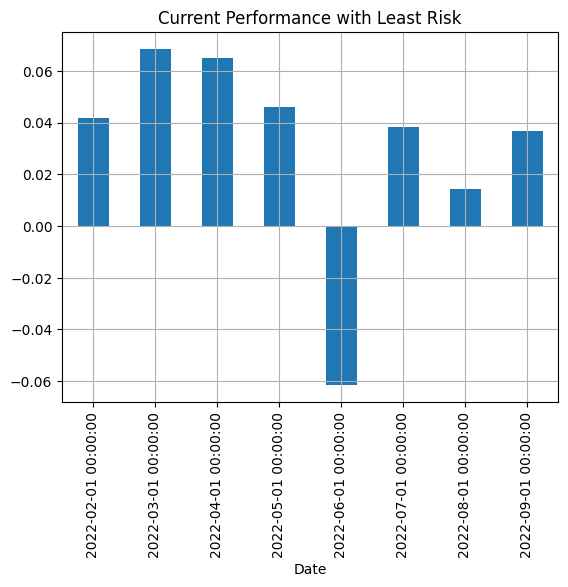

In [20]:
test.total_return.plot.bar()
plt.grid(True)
plt.title('Current Performance with Least Risk')
plt.show()